## Problem Metadata 
DO NOT DELETE. This is a JSON Block. The metadata and course context MUST be in the first cell. 

```json
{
    "problem_title": "combinedPowerCyclePyCalor",
    "author": "tschutzius",
    "year": "Fa25",
    "difficulty_tags": ["medium"],
    "topic": "Power Cycles",
    "lecture_reference": {
        "lecture_id": "",
        "subtopics": [
            {
                "key": "",
                "topic": ""
            },
            {
                "key": "",
                "topic": ""
            }
        ]
    },
    "book_reference": {
        "chapter_number": 10,
        "title": "Vapor and Combined Power Cycles",
        "sections": [
            "Combined Gas-Vapor Power Cycles"
        ]
    },
    "notes": ""
}

## 1. Problem Statement
Consider a combined gas-steam power cycle. The topping cycle is a gas-turbine cycle that has a pressure ratio, $p_\text{r} = 8$. Air enters the compressor at 300 K and the turbine at 1300 K. The isentropic efficiencies of the compressor and gas turbine are 80% and 85%, respectively. The bottoming cycle is an ideal Rankine cycle operating between the pressure limits of 7 MPa and 5 kPa. Steam is heated in a heat exchanger by the exhaust gases to a temperature of 500$^\circ$C. The exhaust gases leave the heat exchanger at 450 K. 

**Goal:** Determine:
* (a) The ratio of the mass flow rates of the steam and the combustion gases and
* (b) the thermal efficiency of the combined cycle

## 2. Schematic 

Draw a schematic that shows a topping cycle and a bottoming cycle. The topping cycle is a Brayton cycle, consisting of a compressor, combustion chamber, gas turbine, and heat exchanger. Heat is transferred in the heat exchanger from the topping cycle to the bottoming cycle. The bottoming cycle consists of this heat excahnger, steam turbine, condenser, and pump. The states are as follows: 

* Bottoming cycle:
    * 1-2 pump
    * 2-3 heat exchanger
    * 3-4 steam turbine
    * 4-1 condenser
* Topping cycle:
    * 5-6 compressor
    * 6-7 combustion chamber
    * 7-8 gas turbine
    * 8-9 heat exchanger

Draw the control volume around each of the steady-flow devices. There is a single inlet and oulet for mass to flow in and out. Indicate that heat is transferred into the combustion chamber. Indicate that shaft work is transferred into the compressor and pump. Indicate that shaft work is transferred out of the gas and steam turbines. 

## 3. Assumptions and Approximations
### A. General (Cycle-Wide) Assumptions for the Bottoming Cycle (Rankine)
1.  **Steady-State/Steady-Flow:** For each device in the cycle ($\Delta m_\text{CV}= 0$, $\Delta E_\text{CV}= 0$, $\Delta S_\text{CV}= 0$).
2.  **Overall Energy:** All changes in **Kinetic Energy ($\Delta KE$) and Potential Energy ($\Delta PE$)** are negligible between components, except where explicitly calculated (e.g., for a nozzle or diffuser).
3.  ***Property Model and Analysis Method:*** 
    * **Property tables: `pyCalor` (Accurate):**
        * **Purpose:** Must be used for determining water properties. 
        * **Tools:** Properties ($h$, $s$, $T$, and $p$) are retrieved directly from a **thermodynamic property library** (e.g., **`pyCalor`**). Since it is a pure substance we only need to know two independent properties.

---

### B. Component-Specific Assumptions for the Bottoming Cycle (Rankine)

1.  **Conservation of Mass:** For all devices operating at steady-flow, the mass entering is equal to the mass exiting: **$\dot{m}_{\text{in}} = \dot{m}_{\text{out}}$**).
2.  **Conservation of Energy (First Law):** The **Steady-Flow Energy Equation** is applied to determine work and heat transfer.
3.  **Entropy Balance (Second Law):** The **Entropy Balance for a Control Volume Equation** is applied to determine changes in entropy.

#### 1-2. Compressor
* **Adiabatic:** $\dot{Q}=0$.
* **Ideal Process:** The ideal process is **Isentropic** ($s_{\text{in}} = s_{\text{out}}$).
* **Actual Process:** The actual work is determined by a specified **Isentropic Efficiency ($\eta_C$)**.

#### 2-3. Boiler
* **Isobaric:** $\Delta p=0$ (constant pressure heat addition).
* **No Shaft Work:** $\dot{W}=0$.

#### 3-4. Turbine
* **Adiabatic:** $\dot{Q}=0$.
* **Ideal Process:** The ideal process is **Isentropic** ($s_{\text{in}} = s_{\text{out}}$).
* **Actual Process:** The actual work is determined by a specified **Isentropic Efficiency ($\eta_T$)**.

#### 4-1. Condenser
* Idealized as a **Heat Exchanger** rejecting heat out of the cycle
* **Isobaric:** $\Delta p=0$ (constant pressure heat addition).
* **No Shaft Work:** $\dot{W}=0$.

---

### C. General (Cycle-Wide) Assumptions for the Topping Cycle (Brayton)
1.  **Steady-State/Steady-Flow:** For each device in the cycle ($\Delta m_\text{CV}= 0$, $\Delta E_\text{CV}= 0$, $\Delta S_\text{CV}= 0$).
2.  **Cold-Air-Standard Assumption**
    * Working fluid is air, which circulates in a closed loop and behaves as an ideal gas.
    * All processes are internally reversible.
    * Combustion processes are replaced by heat-addition processes from an external source.
    * Exhaust processes are replaced by a heat-rejection process, restoring the working fluid to its initial state.
    * Air has constant specific heats whose values are determined at room temperature.
3.  **Overall Energy:** All changes in **Kinetic Energy ($\Delta KE$) and Potential Energy ($\Delta PE$)** are negligible between components, except where explicitly calculated (e.g., for a nozzle or diffuser).
4.  ***Property Model and Analysis Method:*** **(The chosen Specific Heat Implementation)**
    * **Approach: Constant Specific Heat Model (Simpler):**
        * **Fundamental Model:** The working fluid is modeled as an **Ideal Gas**.
        * **Purpose:** Used for quick, hand-calculable estimates.
        * **Specific Heats:** $c_p$ and $c_v$ are assumed to be **constant** (typically evaluated at $25^\circ \text{C}$).
        * **First Law:** Changes in energy are calculated using **$\Delta h = c_p \Delta T$** and **$\Delta u = c_v \Delta T$**.

    * **Alternative Approach: Variable Specific Heat Model (Accurate):**
        * **Purpose:** Used for increased accuracy by using temperature-dependent properties.
        * **Tools:** Properties ($h$, $s$, $T$, and $p$) are retrieved directly from a **thermodynamic property library** (e.g., **`pyCalor`**) based on the **Air model**.
        * **First Law:** Changes in energy are calculated using **$\Delta h = h_{\text{out}} - h_{\text{in}}$** and **$\Delta u = u_{\text{out}} - u_{\text{in}}$**.

---

### D. Component-Specific Assumptions for the Topping Cycle (Brayton)

1.  **Conservation of Mass:** For all devices operating at steady-flow, the mass entering is equal to the mass exiting: **$\dot{m}_{\text{in}} = \dot{m}_{\text{out}}$**).
2.  **Conservation of Energy (First Law):** The **Steady-Flow Energy Equation** is applied to determine work and heat transfer.
3.  **Entropy Balance (Second Law):** The **Entropy Balance for a Control Volume Equation** is applied to determine changes in entropy.

#### 1-2. Compressor
* **Adiabatic:** $\dot{Q}=0$.
* **Ideal Process:** The ideal process is **Isentropic** ($s_{\text{in}} = s_{\text{out}}$).
* **Actual Process:** The actual work is determined by a specified **Isentropic Efficiency ($\eta_C$)**.

#### 2-3. Combustor / Heat Exchanger
* **Isobaric:** $\Delta p=0$ (constant pressure heat addition).
* **No Shaft Work:** $\dot{W}=0$.

#### 3-4. Turbine
* **Adiabatic:** $\dot{Q}=0$.
* **Ideal Process:** The ideal process is **Isentropic** ($s_{\text{in}} = s_{\text{out}}$).
* **Actual Process:** The actual work is determined by a specified **Isentropic Efficiency ($\eta_T$)**.

#### 4-1. Exhaust
* Idealized as a **Heat Exchanger** rejecting heat out of the cycle
* **Isobaric:** $\Delta p=0$ (constant pressure heat addition).
* **No Shaft Work:** $\dot{W}=0$.

## 4. Physical Laws
### Control Volumes:
1.  **First Law of Thermodynamics (Energy Balance for Control Volume):**
    $$\frac{dE_\text{CV}}{dt} = \dot{E}_\text{in} - \dot{E}_\text{out}$$

2.  **Conservation of Mass (Mass Balance for a Control Volume):**
    $$\frac{dm_\text{CV}}{dt} = \dot{m}_\text{in} - \dot{m}_\text{out}$$
    
3.  **Entropy Balance (Second Law for a Control Volume):**
    $$\frac{dS_\text{CV}}{dt} = \dot{S}_\text{in} - \dot{S}_\text{out} + \dot{S}_\text{gen}$$

### Steady-Flow Analysis
Since each devices operates as a **Steady-Flow** device we can write: 

**Mass Balance:**
$$\dot{m}_\text{in} = \dot{m}_\text{out} = \dot{m}$$

**Energy Balance:**
$$\dot{W}_\text{in} + \dot{Q}_\text{in} + \dot{m} \left(h_\text{in} + \frac{w_\text{in}^2}{2} + g z_\text{in} \right) = \dot{W}_\text{out} + \dot{Q}_\text{out} + \dot{m} \left(h_\text{out} + \frac{w_\text{out}^2}{2} + g z_\text{out} \right)$$

Neglecting kinetic and potential energy effects:
$$\dot{W}_\text{in} + \dot{Q}_\text{in} + \dot{m} \left(h_\text{in} \right) = \dot{W}_\text{out} + \dot{Q}_\text{out} + \dot{m} \left(h_\text{out} \right)$$

**Entropy Balance:**
$$\dot{S}_\text{gen} = \dot{S}_\text{out} - \dot{S}_\text{in}$$

Assuming that the process is adiabatic and reversible (isentropic), we have:
$$\dot{S}_\text{out} = \dot{S}_\text{in}$$

and

$$\dot{m}_\text{out}s_\text{out} = \dot{m}_\text{in}s_\text{in}$$

Therefore,

$$s_\text{in} = s_\text{out}$$

### Device Governing Equations (First Law)
We can write our steady-flow energy equation for each device by applying the appropriate **Assumptions and Approximations** listed above.

For the pump (1-2):
$$\dot{W}_\text{in,b} =  \dot{m}_\text{b} \left(h_\text{2a} - h_1\right)$$

For the boiler (2-3):
$$\dot{Q}_\text{in,b} = \dot{m}_\text{b} \left(h_3 - h_\text{2a} \right)$$

For the turbine (3-4):
$$\dot{W}_\text{out,b} = \dot{m}_\text{b} \left(h_3 - h_\text{4a} \right)$$

For the condenser (4-1):
$$\dot{Q}_\text{out,b} = \dot{m}_\text{b} \left(h_\text{4a} - h_1 \right)$$

For the compressor (5-6):
$$\dot{W}_\text{in,t} =  \dot{m}_\text{t} \left(h_\text{6a} - h_5\right)$$

For the hot heat exchanger (Combustor, 6-7):
$$\dot{Q}_\text{in,t} = \dot{m}_\text{t} \left(h_7 - h_\text{6a} \right)$$

For the turbine (7-8):
$$\dot{W}_\text{out,t} = \dot{m}_\text{t} \left(h_\text{8a} - h_7 \right)$$

For the cold heat exchanger (Exhaust, 8-9):
$$\dot{Q}_\text{out,t} = \dot{m}_\text{t} \left(h_\text{8a} - h_9 \right)$$

The heat exchanger is adiabatic. Therefore:

$$\dot{Q}_\text{out,t} = \dot{Q}_\text{in,b} $$

$$\dot{m}_\text{t} \left(h_\text{8a} - h_9 \right) = \dot{m}_\text{b} \left(h_3 - h_\text{2a} \right) $$

$$\frac{\dot{m}_\text{b}}{\dot{m}_\text{t}} = \frac{\left(h_\text{8a} - h_9 \right)}{\left(h_3 - h_\text{2a} \right)}$$

### Isentropic Efficiency (Linking Actual and Ideal States)

The efficiency definitions are used to determine the actual exit enthalpies ($h_{2a}$ and $h_{4a}$):

**Pump Isentropic Efficiency:**
$$\eta_\text{pump} = \frac{\text{Isentropic pump work}}{\text{Actual pump work}} = \frac{h_{2s} - h_1}{h_{2a} - h_1} $$

**Turbine Isentropic Efficiency:**
$$\eta_\text{turbine} = \frac{\text{Actual turbine work}}{\text{Isentropic turbine work}} = \frac{h_{3} - h_{4a}}{h_{3} - h_{4s}} $$

**Compressor Isentropic Efficiency:**
$$\eta_\text{compressor} = \frac{\text{Isentropic compressor work}}{\text{Actual compressor work}} = \frac{h_{2s} - h_1}{h_{2a} - h_1} $$

**Gas Turbine Isentropic Efficiency:**
$$\eta_\text{turbine} = \frac{\text{Actual turbine work}}{\text{Isentropic turbine work}} = \frac{h_{7} - h_{8a}}{h_{7} - h_{8s}} $$

### Performance Metrics (Actual Cycle)
The actual thermal efficiency is defined as the net work output divided by the heat input:
$$\eta_\text{th} = \frac{\left(h_7 - h_\text{8a} \right) + \frac{\dot{m}_\text{b}}{\dot{m}_\text{t}} \left(h_3 - h_\text{4a} \right) - \left[(h_\text{6a} - h_5) + \frac{\dot{m}_\text{b}}{\dot{m}_\text{t}}(h_\text{2a} - h_1) \right] }{ \left(h_7 - h_\text{6a} \right)} $$






In [13]:
# 5. Properties (Code Cell)
!pip install pyCalor
from pyCalor import thermo as th
substanceBottom = 'water'

# Bottom cycle
pBottomMax_MPa = 7
pBottomMin_kPa = 5
TBottomMax_C = 500

# state 3
T3_C = TBottomMax_C
p3_MPa = pBottomMax_MPa
T3_K = T3_C + 273.15
st3 = th.state(substanceBottom,p=(p3_MPa,'Mpa'),T=(T3_C,'C'),name='3')
s3_kJperKgPerK = st3.s

# state 4
p4_kPa = pBottomMin_kPa
p4_MPa = p4_kPa/1000
s4_kJperKgPerK = s3_kJperKgPerK #isentropic
st4s = th.state(substanceBottom,s=(s4_kJperKgPerK,'kJ/kg K'),p=(p4_MPa,'Mpa'),name='4s')

# state 1: Assumed to be a saturated liquid since it is at the exit of the condenser
p1_MPa = p4_MPa
x1 = 0 # saturated liquid
st1 = th.state(substanceBottom,p=(p1_MPa,'Mpa'),x=x1,name='1')
s1_kJperKgPerK = st1.s

# state 2
p2_MPa = p3_MPa
s2_kJperKgPerK = s1_kJperKgPerK #isentropic
st2s = th.state(substanceBottom,s=(s2_kJperKgPerK,'kJ/kg K'),p=(p2_MPa,'Mpa'),name='2s')

# ---------------------

# Top cycle

p_r = 8
eta_C = 0.8
eta_T = 0.85
pAtm_kPa = 101.325
substanceTop = 'air'

# state 5
T5_K = 300
p5_kPa = pAtm_kPa
st5 = th.state(substanceTop,p=(p5_kPa,'kPa'),T=(T5_K,'K'),name='5')

# state 6
p6_kPa = p_r*st5.p
st6s = th.state(substanceTop,s=st5.s,p=(p6_kPa,'kPa'),name='6s')
h6a = st5.h + (st6s.h - st5.h)/eta_C
st6a = th.state(substanceTop,h=(h6a,'kJ/kg'),p=(p6_kPa,'kPa'),name='6a')

# state 7
T7_K = 1300
p7_kPa = st6a.p
st7 = th.state(substanceTop,p=(p7_kPa,'kPa'),T=(T7_K,'K'),name='7')

# state 8
p8_kPa = pAtm_kPa
st8s = th.state(substanceTop,s=st7.s,p=(p8_kPa,'kPa'),name='8s')
h8a = st7.h - eta_T*(st7.h - st8s.h)
st8a = th.state(substanceTop,h=h8a,p=(p8_kPa,'kPa'),name='8a')

# state 9
T9_K = 450
p9_kPa = p8_kPa
st9 = th.state(substanceTop,p=(p9_kPa,'kPa'),T=(T9_K,'K'),name='9')

(a) The ratio of the mass flow rates of the steam and the combustion gases 0.13.
(b) The thermal efficiency of this power plant is 48.70%.


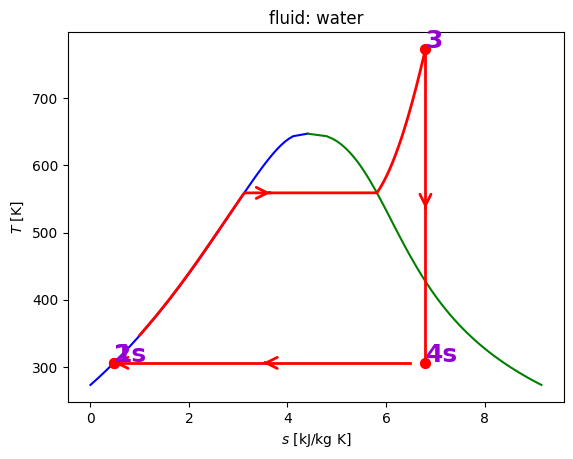

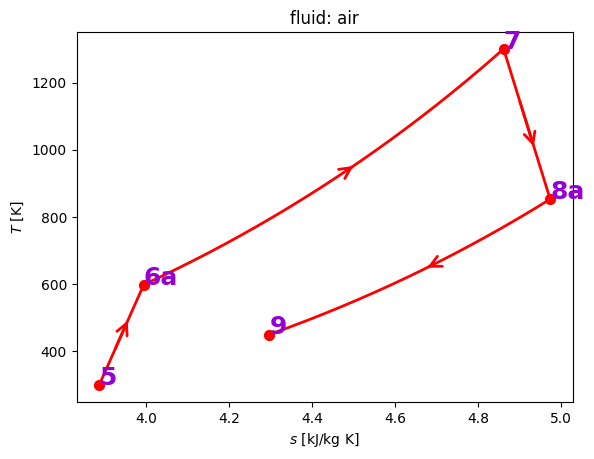

In [25]:
# 6 Calculations (Code Cell)
# qOut_kJperKg = st4s.h - st1.h
qIn_kJperKg = st7.h - st6a.h

mdotRatio = (st8a.h - st9.h) / (st3.h - st2s.h)

wOutBottom_kJperKg = st3.h - st4s.h
wOutTop_kJPerKg = st7.h - st8a.h

wInBottom_kJperKg = st2s.h -  st1.h
wInTop_kJperKg = st6a.h - st5.h

eta = (wOutTop_kJPerKg + mdotRatio*(wOutBottom_kJperKg) -(wInTop_kJperKg + mdotRatio*wInBottom_kJperKg))/qIn_kJperKg

print('(a) The ratio of the mass flow rates of the steam and the combustion gases {0:1.2f}.'.format(mdotRatio))
print('(b) The thermal efficiency of this power plant is {0:1.2%}.'.format(eta))

pr_b = th.process([(st1,st2s),(st2s,st3),(st3,st4s),(st4s,st1)])
fig1 = pr_b.plot('Ts');
# fig1.savefig("figure_1.pdf")

pr_t = th.process([(st5,st6a),(st6a,st7),(st7,st8a),(st8a,st9)])
fig2 = pr_t.plot('Ts');
# fig2.savefig("figure_2.pdf")

## 7. Summary and Reasoning
We've analyzed a combined gas-vapor power cycle. We would expect the efficiency of the combined system to be relatively high since we're transferring heat in at a high temperature and out at a low temperature. This is possible because the relatively high grade heat that would otherwise be exhausted from the gas power cycle is used to drive the vapor power cycle. The thermal efficiency of the combined gas-vapor power cycle is close to 50% even with actual compressor and gas turbine performance.

In [ ]:
THIS SHOULD BE THE FINAL CELL, DO NOT ADD OTHERS AFTER THIS, EVEN IF THEY'RE EMPTY
--- End of the Jupyter Notebook ---